#### Importing library

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

#### Reading the Data

In [265]:
df = pd.read_csv(r'D:\Projects\AI Assistant\notebooks\Admission_Predict.csv')
df.drop(['Serial No.'],axis = 1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Exploratory Data Analysis

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


We can see all the features in our dataset is numerical. 

- GRE Score, TOEFL Score, University Rating & Research being of Integer dtype
- SOP, LOR, GPA & Change of admit (target variable) being float dtype

In [267]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Above, we can see some statistical analysis of our dataframe. We can see values of GRE and TOEFL Score are of relatively high magnitude as compared to other features of the dataset.
This means we might have to normalize the values in both these columns.

In [268]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no Null/NaN values in our dataset

In [269]:
df.duplicated().sum()

0

There is no duplicate data present in our dataframe.

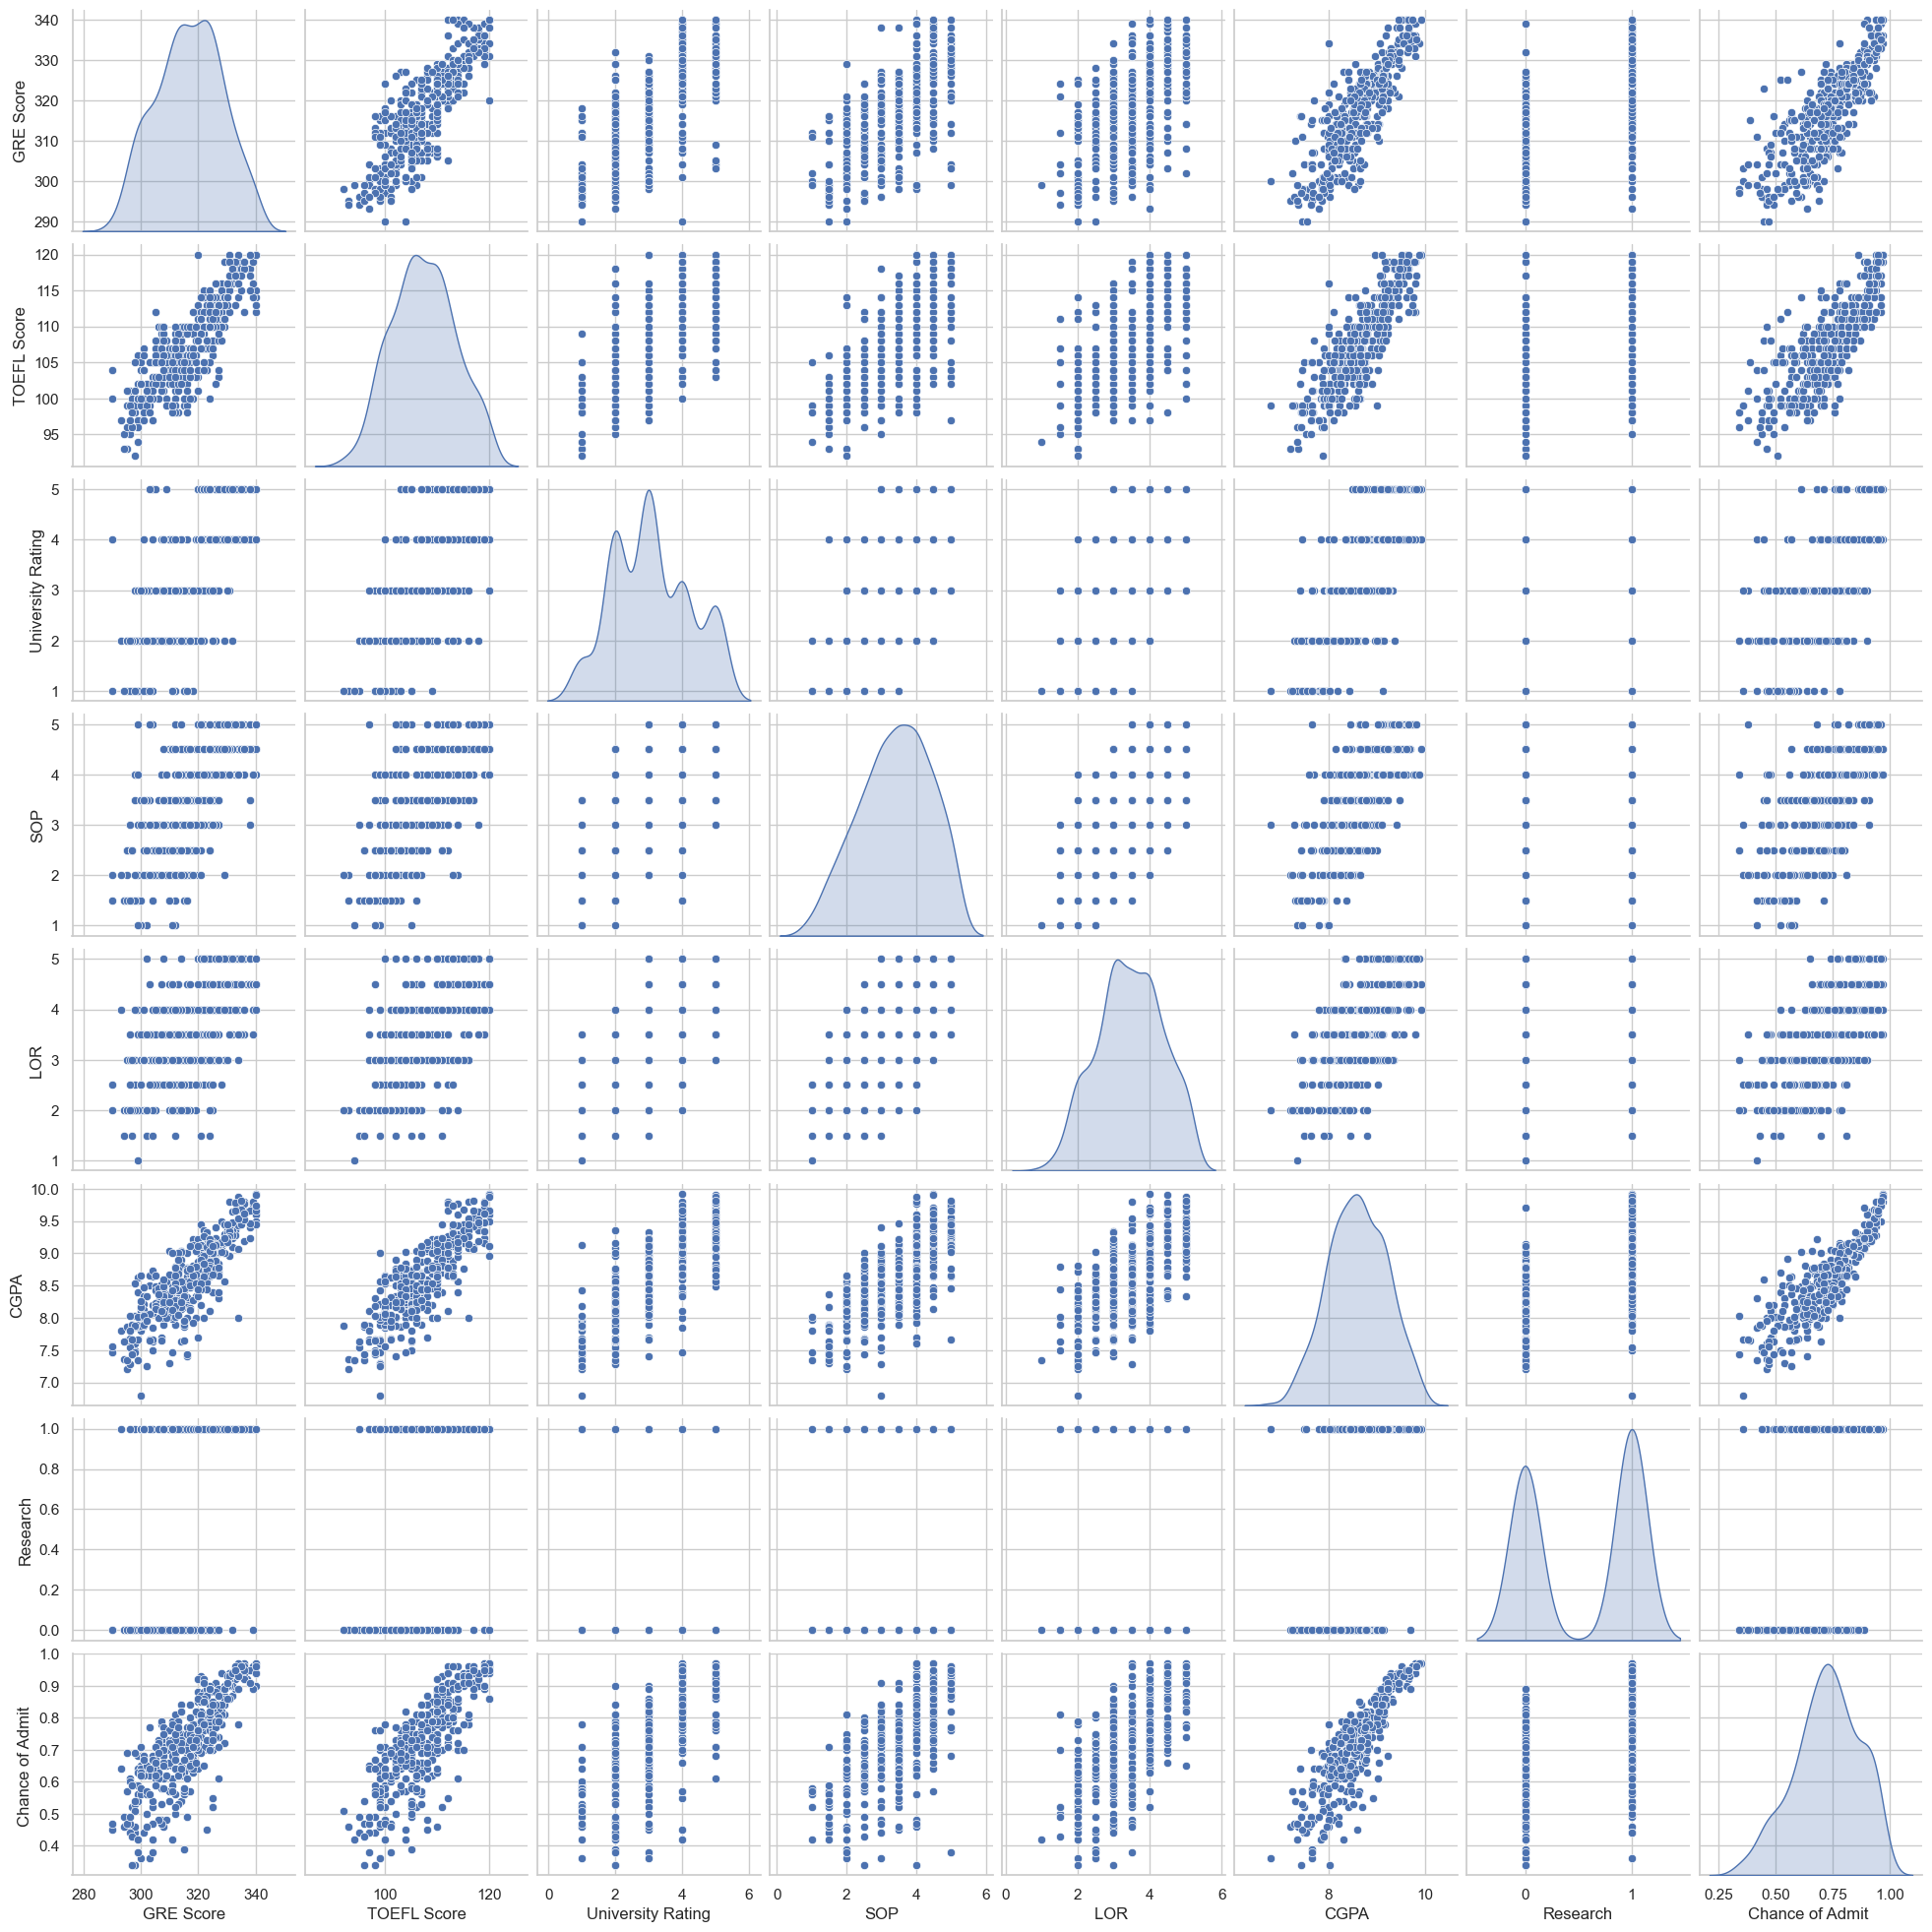

In [270]:
sns.pairplot(df,diag_kind='kde')

A pairplot is a graphical representation that allows you to visualize pairwise relationships in a dataset. As we have a multi-dimensional data & using scatterplot to analyze multi-dimensional data is tedious therefore we can use pairplot.


Looking at the Independent variables : 

1. **CGPA, TOEFL Score & GRE SCORE** -  shows linear relationship with each other. All columns are approximately Normally distributed. Although GRE Score is not linearly related with University rating, it is evident that students with high GRE Scores are admitted to univresities with higher rating. 

2. **SOP, LOR & University rating** - Does not exhibit liniear relationship with any Independent column. SOP & LOR are approximately Normally distributed.

3. **Research** - Column containing Binary Values (0,1) tells whether a person has prior research experience or not.


Dependent and Independent variables Relationship :

**Chance of admit** is the dependent column. **CGPA, TOEFL Score & GRE SCORE** shows linear relationship with the dependent feature. **SOP, LOR, Research & University rating** does not show linear relationship with **chance of admit**.

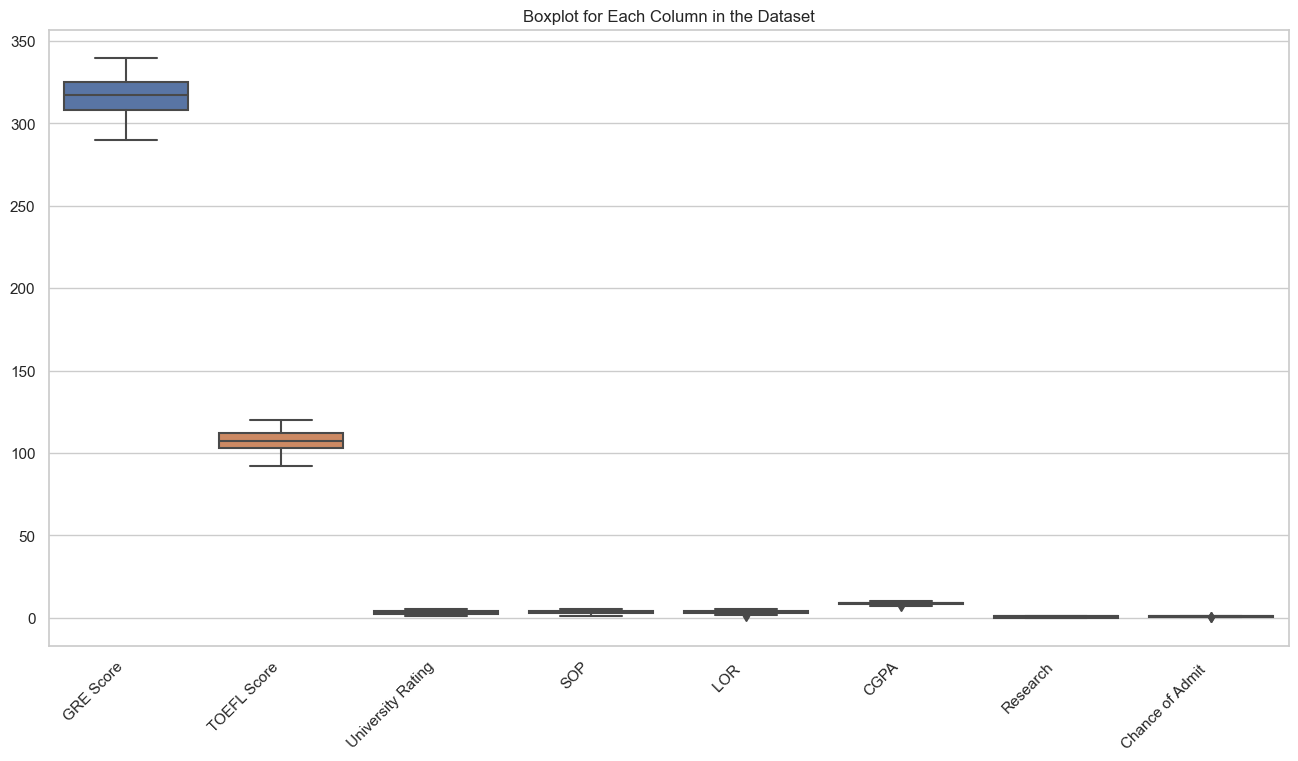

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(16, 8))

sns.boxplot(data=df)

plt.xticks(rotation=45, ha='right')

plt.title('Boxplot for Each Column in the Dataset')
plt.show()


We can see there are no potential outliers in our dataset

#### Data Pre - Processing

Let's perform standardization

In [272]:
x = df.iloc[:,0:7]
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [273]:
y = df.iloc[:,-1]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

Performing Train-Test split on our dataframe df

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

X_train.shape, X_test.shape

((320, 7), (80, 7))

In [275]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training set for features
scaler.fit(X_train)

# Transform both the training and test sets for features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [276]:
X_train_scaled.shape,X_test_scaled.shape

((320, 7), (80, 7))

In [277]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [278]:
X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.905291,-1.389388,-0.968496,-0.893681,-0.515584,-1.593925,-1.091687
1,-1.730041,-1.555969,-0.968496,-0.893681,-0.515584,-1.560260,-1.091687
2,0.460578,0.443001,-0.088045,0.080690,-1.074861,0.122982,0.916013
3,0.723452,0.443001,-0.968496,-0.406495,-1.074861,0.274474,0.916013
4,-0.065171,0.276420,-0.088045,0.080690,-0.515584,0.274474,-1.091687
...,...,...,...,...,...,...,...
315,-1.029043,0.776163,-0.088045,-0.406495,0.043694,0.089317,-1.091687
316,0.986326,1.442486,1.672857,1.542246,1.721526,1.520072,0.916013
317,0.372953,0.609582,1.672857,1.542246,1.721526,1.435910,0.916013
318,-0.240420,-0.389903,-0.088045,0.080690,-1.074861,-0.499818,-1.091687


As we can see, all the values are brought within a perticular scale. We earlier saw values of GRE and TOEFL Score are of relatively high magnitude as compared to other features of the dataset, which can cause bias but now as we have standardized the values, it should'nt be an issue.

In [279]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

effect of feature scaling on GRE column

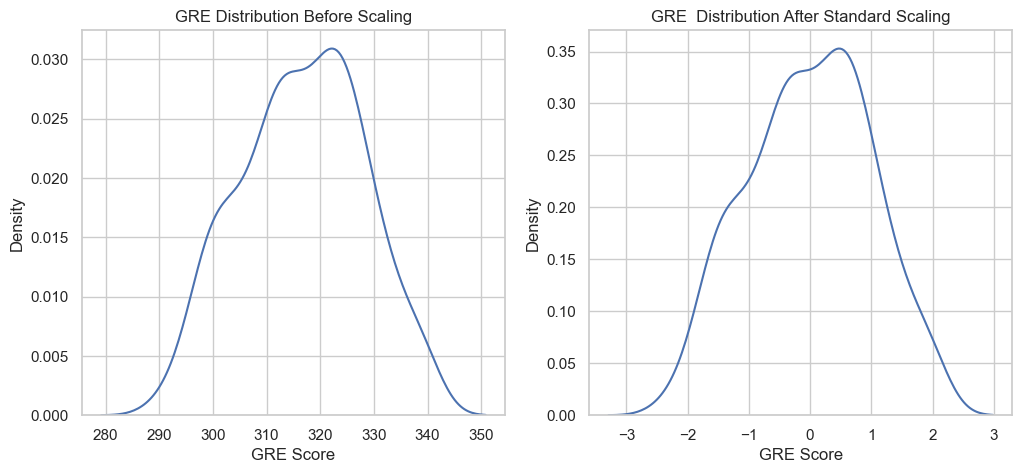

In [280]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('GRE Distribution Before Scaling')
sns.kdeplot(X_train['GRE Score'], ax=ax1)

# after scaling
ax2.set_title('GRE  Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['GRE Score'], ax=ax2)
plt.show()

We can see that there is no change in distribution after scaling, which means our standardizing has not negatively impacted our columns in dataset.

### Regression Analysis

Let's concatenate our X_train_scaled, X_test_scaled, y_train, y_test into a datframe = df_scaled

In [281]:
import pandas as pd

# Reset index for X_train_scaled and X_test_scaled
X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)

# Concatenate X_train_scaled and X_test_scaled along rows
X_scaled = pd.concat([X_train_scaled, X_test_scaled])

# Reset index for y_train and y_test
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Concatenate y_train and y_test along rows
y = pd.concat([y_train, y_test])

# Reset index for X_scaled and y
X_scaled.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Concatenate X_scaled, y along columns to create the final df_scaled DataFrame
df_scaled = pd.concat([X_scaled, y], axis=1)

df_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,-1.905291,-1.389388,-0.968496,-0.893681,-0.515584,-1.593925,-1.091687,0.57
1,-1.730041,-1.555969,-0.968496,-0.893681,-0.515584,-1.560260,-1.091687,0.59
2,0.460578,0.443001,-0.088045,0.080690,-1.074861,0.122982,0.916013,0.80
3,0.723452,0.443001,-0.968496,-0.406495,-1.074861,0.274474,0.916013,0.75
4,-0.065171,0.276420,-0.088045,0.080690,-0.515584,0.274474,-1.091687,0.77


In the EDA step, scatterplot of our dependent feature **Chance of admit** is not linearly correlated to our independent features **SOP, LOR, Research & University rating** . This Questions our Linear Regression Assumption of Linearity. Therefore we will now check it via corr(). 

df.corr() - Pearson's correlation coefficient used to measure the relationship between two variables, the values range from -1 to 1:

- 1: A perfect positive correlation.
- 0: No correlation.
- -1: A perfect negative correlation.

In [282]:
df_scaled.shape

(400, 8)

<Axes: >

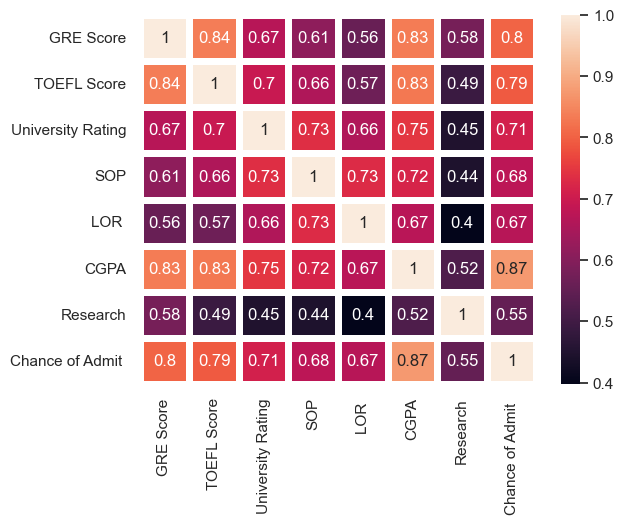

In [283]:
sns.heatmap(df_scaled.corr(),annot=True,linewidth=5)

As all of our independent features corr values are close to 1, we can assume relationship between independent and dependent variables is linear.

In [284]:
import statsmodels.api as st
X=df_scaled.drop('Chance of Admit ',axis=1)
Y=df_scaled['Chance of Admit ']
X_train=st.add_constant(X)
model=st.OLS(Y,X_train).fit()

In [285]:
predictions=model.predict(X_train)
residuals=model.resid

In [286]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 26 Dec 2023   Prob (F-statistic):          3.12e-134
Time:                        14:32:40   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7239      0.003    226.826      0.000       0.718       0.730
GRE Score             0.0198      0.007      2.906      0.004       0.006       0.033
TOEFL Score           0.0175      0.007      2.680      0.008       0.005       0.030
University Rating     0.0065      0.005      1.198      0.232      -0.004       0.017
SOP                  -0.0034      0.006     -0.594      0.553      -0.015       0.008
LOR                   0.0200      0.005      4.034      0.000       0.010       0.030
CGPA                  0.0707      0.007      9.734      0.000       0.056       0.085
Research              0.0122      0.004      3.081      0.002       0.004       0.020
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared: 0.803**, In this case, approximately 80.3% of the variability in the Chance of Admit is accounted for by the model.

- **Adjusted R-squared: 0.800**, Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It penalizes for adding unnecessary & uninformative variables. Here, it's very close to the R-squared, indicating that the included variables contribute meaningfully to the model.

- **F-statistic: 228.9**, A higher F-statistic suggests that the model is more likely to be significant. In this case, the F-statistic is 228.9, which is quite high.
 
The F-statistic is a statistical measure used in regression analysis to test the overall significance of the regression model. In simple terms, it helps us answer the question: "Is our entire model meaningful? Does it explain the variation in the dependent variable significantly?"

- **Prob (F-statistic):	3.12e-134**, 

**H0:**: Model is not statistically significant.
**Ha**:  Model is statistically significant.

as 3.12e-134 < 0.05 =>  p-value is less than α (p < α), we reject the null hypothesis. Hence, The overall model is statistically significant, suggesting that there is valuable information in the included variables for predicting the dependent variable.

- **const: -1.2594**, This is the intercept or constant term. When all other variables are zero, the estimated Chance of Admit is approximately -1.2594. The low p-value (0.000) indicates that we reject the null hypothesis, suggesting that the intercept is statistically significant.

- The Durbin-Watson statistic checks for autocorrelation in the residuals. The value of **1.964 is close to 2**, indicating that there is little evidence of significant autocorrelation. This is good news as it suggests that the residuals do not show a strong pattern of dependence.

- All features excluding **University rating and SOP** are statistically significant having p value < 0.05.

- The Omnibus test tests the hypothesis that the residuals are normally distributed. The test statistic is high (87.895), and the very low p-value (0.000) suggests that the residuals are not normally distributed.

- The **Jarque-Bera test** is another test for normality of residuals. The test statistic is high (181.191), and the very low p-value (4.52e-40) suggests that the residuals are not normally distributed. This reinforces what we saw in the Omnibus test.

- **Skewness** measures the asymmetry of the distribution of residuals. A skewness value of -1.159 indicates a negatively skewed distribution, meaning that the left tail is longer or fatter than the right tail.

- **Kurtosis** measures the "tailedness" of the distribution of residuals. A kurtosis value of 5.344 indicates that the distribution has heavier tails than a normal distribution.


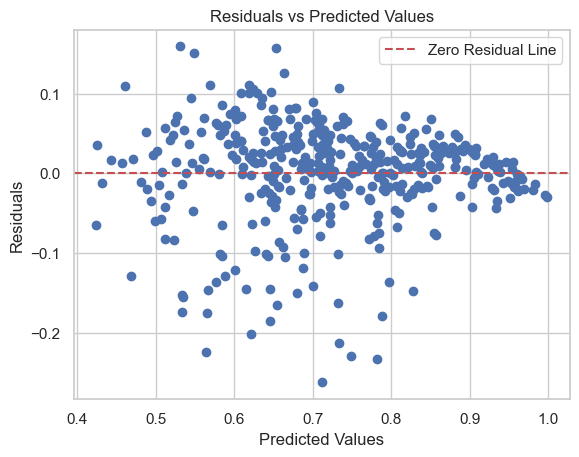

In [287]:
# Create a scatter plot of residuals vs predicted values

plt.scatter(predictions, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.legend()
plt.show()

any recognizable pattern or trend in the residuals as we move along the predicted values cannot be observed. The spread of residuals to be fairly constant across all levels of predicted values.
**Therefore, there is no homoscedacity**.

Text(0.5, 1.0, 'Histogram of residual dist.')

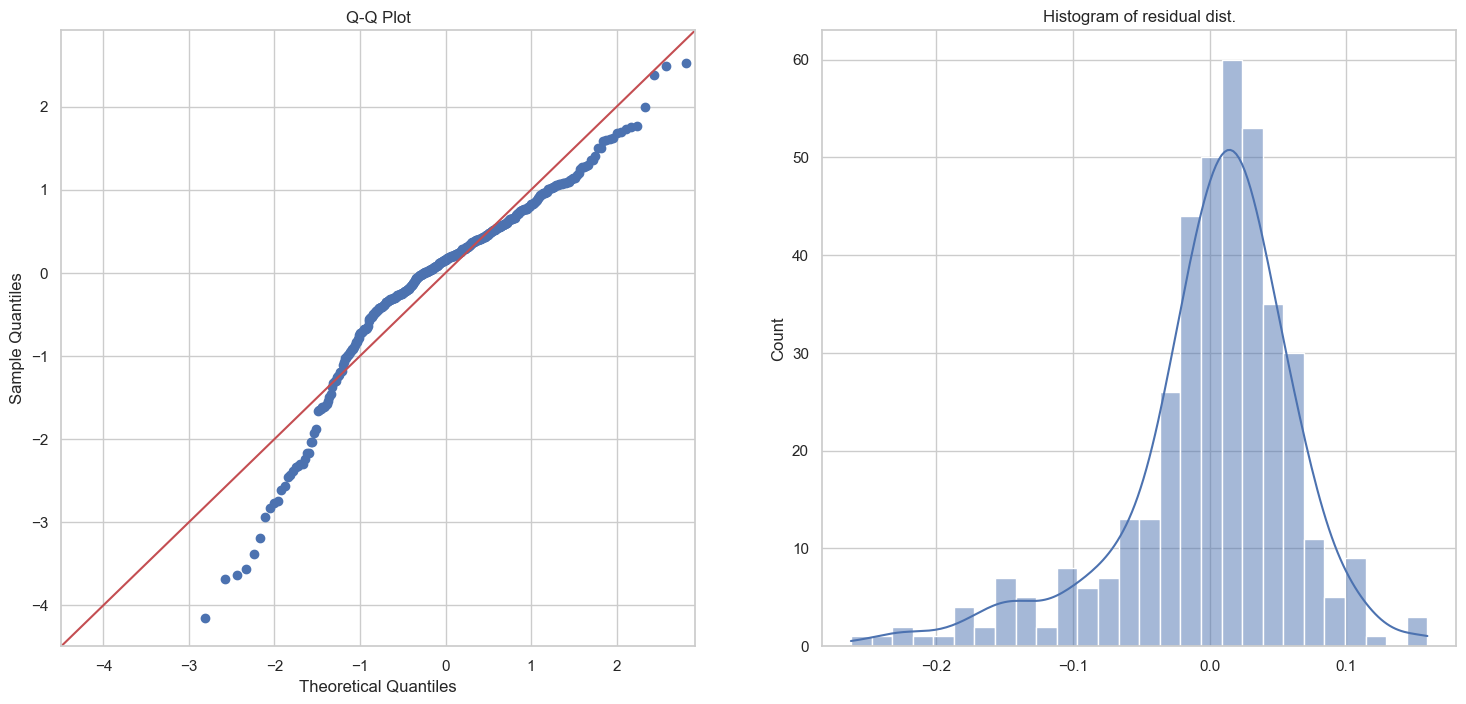

In [288]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
st.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title('Q-Q Plot')
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title('Histogram of residual dist.')

We can see that the residuals are not normally distributed as the tails heavily deviate from the line. The distribution is more left - skewed.

#### Applying the MLR, Ridge & Lasso Algorithm

In [290]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

models = [['DecisionTree:', DecisionTreeRegressor()],
          ['Linear Regression:', LinearRegression()],
          ['Lasso:', Lasso(alpha=0.1)],
          ['Ridge:', Ridge()]]

print("Results...")

X = df_scaled.iloc[:,0:7]
Y = df_scaled.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for name, model in models:
    model.fit(X,Y)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Adjusted R-squared calculation
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    print(f"{name} MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adj R2: {adj_r2:.4f}")

Results...
DecisionTree: MSE: 0.0000, RMSE: 0.0000, R2: 1.0000, Adj R2: 1.0000
Linear Regression: MSE: 0.0051, RMSE: 0.0711, R2: 0.7570, Adj R2: 0.7334
Lasso: MSE: 0.0157, RMSE: 0.1253, R2: 0.2441, Adj R2: 0.1706
Ridge: MSE: 0.0051, RMSE: 0.0711, R2: 0.7569, Adj R2: 0.7332


- **Decision Tree:**

1. MSE (Mean Squared Error): 0.0000, Lower MSE indicates better model performance. A value of 0.0000 suggests that the model perfectly predicts the target variable.
2. RMSE (Root Mean Squared Error): 0.0000, Similar to MSE, lower values are better. A value of 0.0000 indicates perfect predictions.
3. R2 (R-squared): 1.0000, R-squared measures the proportion of the variance in the target variable that is predictable from the independent variables. A value of 1.0000 indicates that the model explains all the variability in the target variable.
4. Adjusted R2: 1.0000, Adjusted R-squared accounts for the number of predictors in the model. A value of 1.0000 indicates a perfect fit.

DECISION TREE IS OVERFITTING BECAUSE OF LESS DATA


- **Linear Regression:**

1. R2: 0.7570, R-squared of 0.7570 suggests that approximately 75.7% of the variability in the target variable is explained by the model.

Overall, Linear regression performs quite well on just 400 records.

- **Lasso Regression:**

1. MSE: 0.0157
2. RMSE: 0.1253
3. R2: 0.2441, R-squared of 0.2441 suggests that only 24.4% of the variability in the target variable is explained by the model.
Adjusted R2: 0.1706
4. Adjusted R-squared accounts for the number of predictors. A value of 0.1706 suggests less explanatory power compared to linear regression.

Lasso is the worst performing algorithm for our data.

- **Ridge Regression:**


1. R2: 0.7569, R-squared of 0.7569 indicates that approximately 75.7% of the variability in the target variable is explained by the model.
Adjusted R2: 0.7332

Ridge also performs well on our data.